In [2]:
%matplotlib inline
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# LOAD DATA AND and preprocess the data 
# animal categories
categories = ['dog', 'panda', 'cat']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/Users/ejbeazleigh/Downloads/Animals/' 
#path which contains all the categories of images
for i in categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,55,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')
x=np.array(flat_data_arr)
y=np.array(target_arr)

loading... category : dog
loaded category:dog successfully
loading... category : panda
loaded category:panda successfully
loading... category : cat
loaded category:cat successfully


In [5]:
#checking shape is okay 
print(x.shape)
print(y.shape)

(3000, 5280)
(3000,)


In [4]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix 
import seaborn as sns 

#initialise the stratfield k-fold 4 crossval 
#with nsplits defining the no. of folds in this case 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#Hyperparameters for tuning
param_grid = [{'max_depth':list(range(1,10))}]
#define Model
DTmodel = DecisionTreeClassifier()
gridsearch = GridSearchCV(DTmodel, param_grid,cv=skf)

f1List = []
accuracyList = []
cmList = []

In [5]:

#SUMMARY ... Iterate through each fold train the model with optimised parameters and calculate metrics
#spltting the data into training and validation sets for each fold of the cross validation
for fold, (train_index, val_index) in enumerate(skf.split(x,y)):
    trainX, trainY = x[train_index],y[train_index]
    valX, valY = x[val_index], y[val_index]
##intialize the DECISON TREE model with new found best hyperparameters 
    gridsearch.fit(trainX, trainY)
    best_params = gridsearch.best_params_
    DTmodel = DecisionTreeClassifier(max_depth=best_params['max_depth'])
    #train thr decision tree based on training set    
    DTmodel.fit(trainX, trainY)
#predict on validation set and calculate metrics    
    predY = DTmodel.predict(valX)
    acc = accuracy_score(valY,predY)
    accuracyList.append(acc)
    f1 = f1_score(valY,predY,average='macro')
    f1List.append(f1)
    cm = confusion_matrix(valY,predY)
    cmList.append(cm)
    
    print(f"Fold{fold+1}:accuracy = {acc}, f1score = {f1}")

Fold1:accuracy = 0.5233333333333333, f1score = 0.523011413487338
Fold2:accuracy = 0.57, f1score = 0.5729451299919178
Fold3:accuracy = 0.5533333333333333, f1score = 0.5525428693535143
Fold4:accuracy = 0.55, f1score = 0.5240332190555949
Fold5:accuracy = 0.5266666666666666, f1score = 0.5305285755784945
Fold6:accuracy = 0.53, f1score = 0.5261044176706827
Fold7:accuracy = 0.5533333333333333, f1score = 0.5570185314016421
Fold8:accuracy = 0.5433333333333333, f1score = 0.528356703635073
Fold9:accuracy = 0.5433333333333333, f1score = 0.5329618863049096
Fold10:accuracy = 0.5366666666666666, f1score = 0.5262368039370557


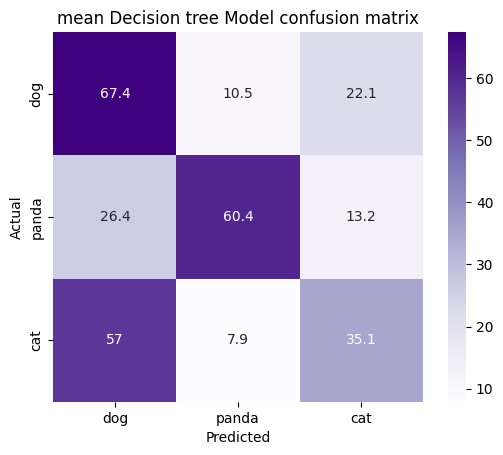

<Figure size 640x480 with 0 Axes>

Mean Accuracy: 0.5429999999999999
Mean f1 Score: 0.5373739550416222


In [6]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix 
import seaborn as sns 

mean_acc = sum(accuracyList)/len(accuracyList)
mean_f1 = sum(f1List)/len(f1List)
meanCM = sum(cmList)/len(cmList)

ax = plt.axes()
sns.heatmap(meanCM,ax=ax,annot=True,fmt='g',cmap='Purples',square=True)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:grey')
ax.set_title('mean Decision tree Model confusion matrix')
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()
print(f"Mean Accuracy: {mean_acc}")
print(f"Mean f1 Score: {mean_f1}")